In [ ]:
import os
for i in os.listdir("data1"):
    print(i)

elephant
buffalo
rhino
zebra


In [ ]:
os.listdir('data1/buffalo')[:7]

['320.txt', '020.jpg', '072.jpg', '321.jpg', '291.jpg', '294.txt', '166.jpg']

In [ ]:
data = open('data1/buffalo/001.txt')

In [ ]:
data.read()

'0 0.560000 0.663017 0.617500 0.644769'

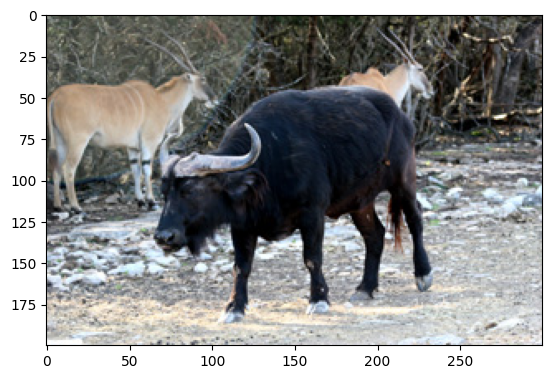

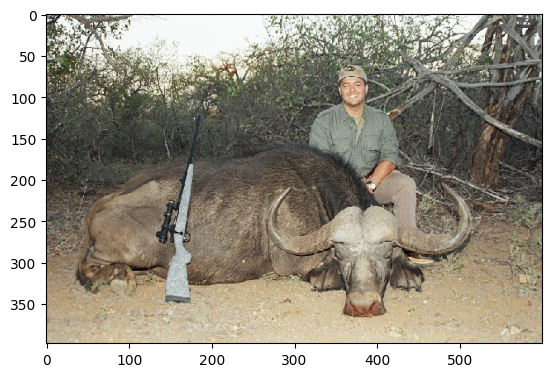

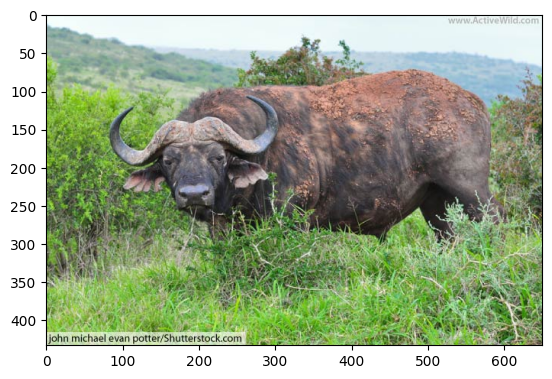

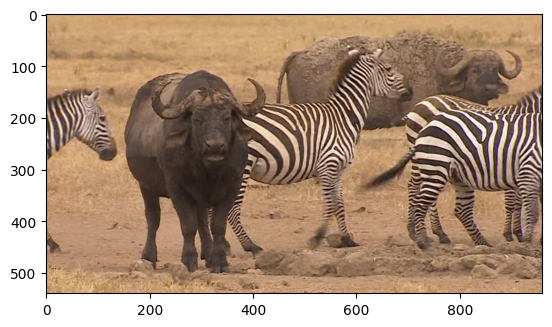

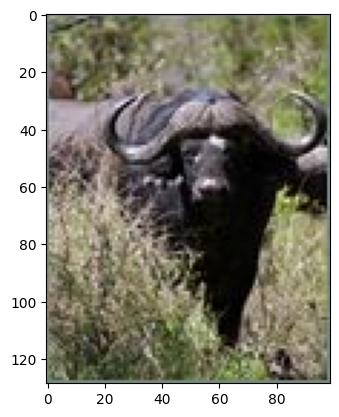

In [ ]:
#Plotting first 5 images of buffalo
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
k=0
for i in os.listdir('data1/buffalo'):
  if i[-3:] !='txt':
    img=mpimg.imread('data1/buffalo/'+i)
    plt.imshow(img)
    plt.show()
    k+=1
  if k==5:
    break

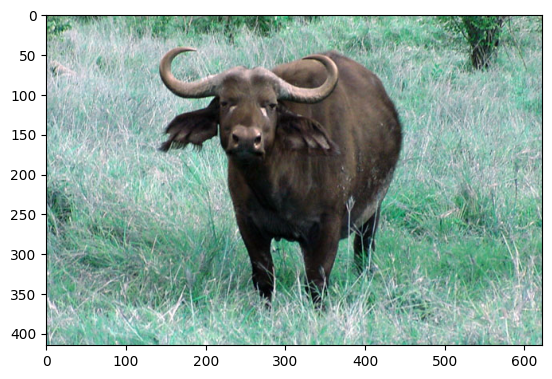

In [ ]:
import pandas as pd
import cv2
img = cv2.imread('data1/buffalo/002.jpg')
plt.imshow(img)
plt.show()

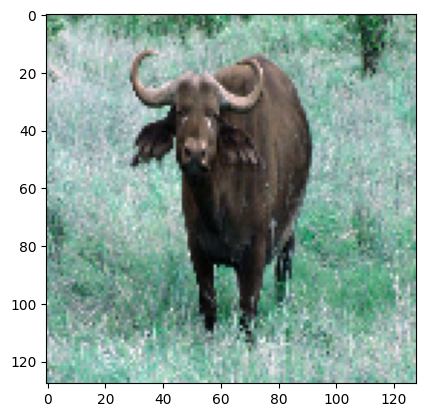

In [ ]:
img_resized = cv2.resize(img, (128,128))
plt.imshow(img_resized)
plt.show()

In [ ]:
img_reshaped = img_resized.reshape(49152)

In [ ]:
# Resizing and reshaping the data for buffalo
df=[]
label=[]
for i in os.listdir('data1/buffalo'):
  if i[-3:] !='txt':
    img=cv2.imread('data1/buffalo/'+i)
    img = cv2.resize(img, (128,128))
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(0)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)

In [ ]:
data.head()

,label,0,1,2,3,4,5,6,7,8,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,119,135,133,84,98,86,79,95,85,...,234,219,216,219,234,227,228,231,222,219
1,0,29,26,26,155,161,141,144,151,149,...,195,167,192,198,136,161,165,168,198,205
2,0,255,254,243,254,255,243,253,254,244,...,152,80,112,122,126,143,159,69,85,92
3,0,121,170,216,118,167,213,124,173,217,...,190,115,157,201,115,158,199,107,150,191
4,0,120,135,127,117,133,124,115,133,124,...,123,130,135,121,131,136,120,133,136,120


In [ ]:
#Drop a column from dataframe
X = data.drop(['label'],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,119,135,133,84,98,86,79,95,85,94,...,234,219,216,219,234,227,228,231,222,219
1,29,26,26,155,161,141,144,151,149,66,...,195,167,192,198,136,161,165,168,198,205
2,255,254,243,254,255,243,253,254,244,253,...,152,80,112,122,126,143,159,69,85,92
3,121,170,216,118,167,213,124,173,217,122,...,190,115,157,201,115,158,199,107,150,191
4,120,135,127,117,133,124,115,133,124,116,...,123,130,135,121,131,136,120,133,136,120


In [ ]:
y=data['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
# Splitting the data using train_test_split
from sklearn.model_selection import train_test_split
xtr1,xts1,ytr1,yts1=train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
xtr1.shape,xts1.shape,ytr1.shape,yts1.shape

((300, 49152), (76, 49152), (300,), (76,))

In [ ]:
# Resizing and reshaping the data for elephant
df=[]
label=[]
for i in os.listdir('data1/elephant'):
  if i[-3:] !='txt':
    img=cv2.imread('data1/elephant/'+i)
    img = cv2.resize(img, (128,128))
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(1)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X = data.drop(['label'],axis=1)
y=data['label']
xtr2,xts2,ytr2,yts2=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Resizing and reshaping the data for rhino
df=[]
label=[]
for i in os.listdir('data1/rhino'):
  if i[-3:] !='txt':
    img=cv2.imread('data1/rhino/'+i)
    img = cv2.resize(img, (128,128))
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(2)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X = data.drop(['label'],axis=1)
y=data['label']
xtr3,xts3,ytr3,yts3=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Resizing and reshaping the data for zebra
df=[]
label=[]
for i in os.listdir('data1/zebra'):
  if i[-3:] !='txt':
    img=cv2.imread('data1/zebra/'+i)
    img = cv2.resize(img, (128,128))
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(3)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X = data.drop(['label'],axis=1)
y=data['label']
xtr4,xts4,ytr4,yts4=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Training Input
X_train=pd.concat([xtr1,xtr2,xtr3,xtr4],axis=0)

#Training Output
y_train=pd.concat([ytr1,ytr2,ytr3,ytr4],axis=0)

#Testing Input
X_test=pd.concat([xts1,xts2,xts3,xts4],axis=0)

#Testing Output
y_test=pd.concat([yts1,yts2,yts3,yts4],axis=0)

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
print(train.shape)
train=train.sample(frac=1)
test=pd.concat([X_test,y_test],axis=1)
test = test.sample(frac=1)

X_train=train.drop(['label'],axis=1)
y_train=train['label']
X_test=test.drop(['label'],axis=1)
y_test=test['label']
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(1200, 49153)


((1200, 49152), (304, 49152), (1200,), (304,))

In [ ]:
# Converting the data into numpy array
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

In [ ]:
X_train=X_train.reshape(1200,128,128,3)
X_test=X_test.reshape(304,128,128,3)
# y_train=y_train.reshape(1200,1)
# y_tets=y_test.reshape(304,1)

In [ ]:
decoder=['buffalo','elephant','rhino','zebra']

In [ ]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

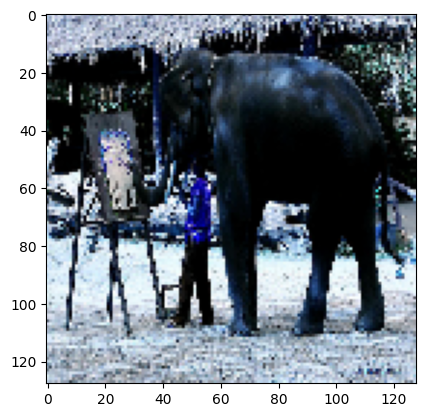

elephant


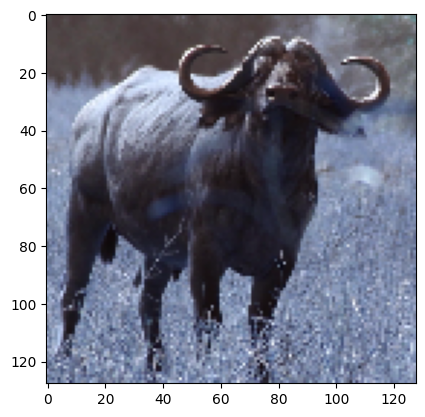

buffalo


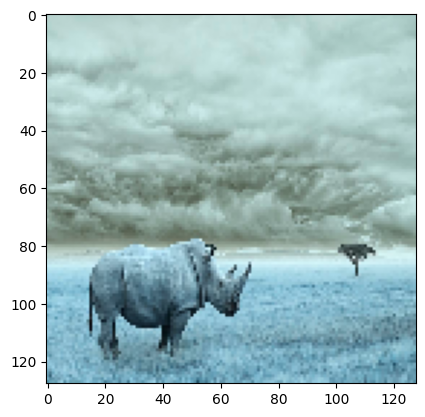

rhino


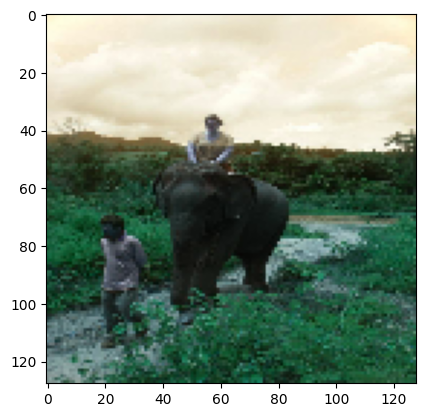

elephant


In [ ]:
for i in range(4):
  plt.imshow(X_train[i])
  plt.show()
  print(decoder[y_train[i]])

In [ ]:
y_train=y_train.reshape(1200,1)
y_test=y_test.reshape(304,1)

In [ ]:
# Creating Convolution Layers
from tensorflow.keras import Sequential
model=Sequential()
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 dense (Dense)               (None, 126, 126, 64)      4160      
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 dense_1 (Dense)             (None, 126, 126, 64)      4160      
                                                                 
 dropout_1 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 348s 6s/step - loss: 806.5381 - accuracy: 0.2475 - val_loss: 11.0880 - val_accuracy: 0.2237
Epoch 2/10
60/60 [==============================] - 356s 6s/step - loss: 1.4369 - accuracy: 0.2542 - val_loss: 9.2060 - val_accuracy: 0.2138
Epoch 3/10
60/60 [==============================] - 331s 6s/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 9.1992 - val_accuracy: 0.2138
Epoch 4/10
60/60 [==============================] - 338s 6s/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 9.1995 - val_accuracy: 0.2138
Epoch 5/10
60/60 [==============================] - 339s 6s/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 9.1999 - val_accuracy: 0.2138
Epoch 6/10
60/60 [==============================] - 350s 6s/step - loss: 1.3864 - accuracy: 0.2425 - val_loss: 9.2002 - val_accuracy: 0.2138
Epoch 7/10
60/60 [==============================] - 332s 6s/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 9.1985 - val_accuracy: 0.2138
Epoch 8/10

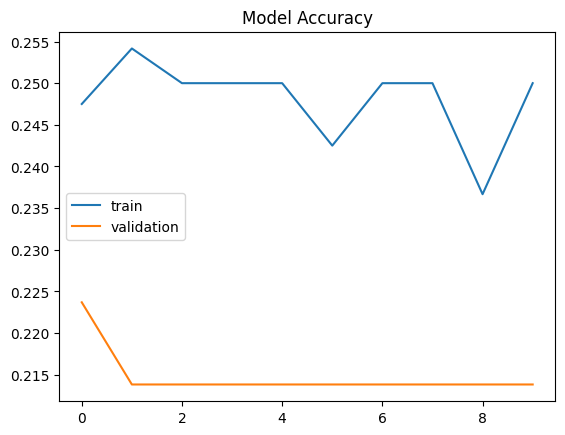

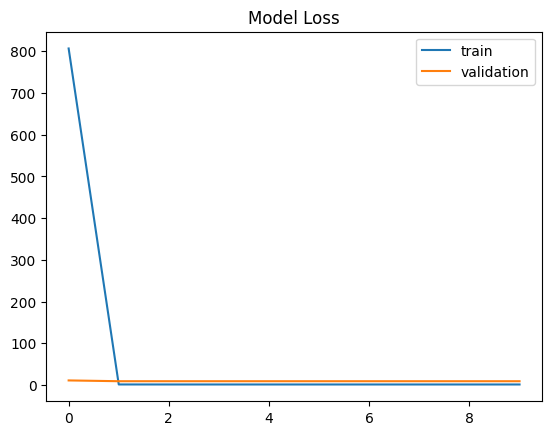

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(4,4),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      3136      
                                                                 
 dense_4 (Dense)             (None, 125, 125, 64)      4160      
                                                                 
 dropout_2 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 dense_5 (Dense)             (None, 125, 125, 64)      4160      
                                                                 
 dropout_3 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 flatten_1 (Flatten)         (None, 1000000)           0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 323s 5s/step - loss: 875.9129 - accuracy: 0.3533 - val_loss: 25.9901 - val_accuracy: 0.4605
Epoch 2/10
60/60 [==============================] - 322s 5s/step - loss: 10.7955 - accuracy: 0.6233 - val_loss: 5.4473 - val_accuracy: 0.6118
Epoch 3/10
60/60 [==============================] - 319s 5s/step - loss: 2.3183 - accuracy: 0.8058 - val_loss: 3.7026 - val_accuracy: 0.6678
Epoch 4/10
60/60 [==============================] - 322s 5s/step - loss: 1.3020 - accuracy: 0.8517 - val_loss: 4.0133 - val_accuracy: 0.6447
Epoch 5/10
60/60 [==============================] - 322s 5s/step - loss: 0.2539 - accuracy: 0.9483 - val_loss: 4.6911 - val_accuracy: 0.6118
Epoch 6/10
60/60 [==============================] - 323s 5s/step - loss: 0.1359 - accuracy: 0.9667 - val_loss: 3.3584 - val_accuracy: 0.6283
Epoch 7/10
60/60 [==============================] - 335s 6s/step - loss: 0.1076 - accuracy: 0.9767 - val_loss: 4.5083 - val_accuracy: 0.6184
Epoch 8/1

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(2,2),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

NameError: name 'Sequential' is not defined

In [ ]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epoch=6

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=epoch,verbose=1,validation_data=(X_test,y_test))

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [ ]:
prediction=model.predict(X_test)
type(prediction[0])

In [ ]:
tr_pred=model.predict(X_train)
y1=[]
for i in tr_pred:
  y1.append(np.argmax(i))
ts_pred=model.predict(X_test)
y2=[]
for i in ts_pred:
  y2.append(np.argmax(i))

In [ ]:
for i in range(len(y1)):
  y1[i]=decoder[y1[i]]
for i in range(len(y2)):
  y2[i]=decoder[y2[i]]
y_train=y_train.reshape(1200)
y_test=y_test.reshape(304)
y_1=[]
y_2=[]
for i in range(len(y_train)):
  y_1.append(decoder[y_train[i]])
for i in range(len(y_test)):
  y_2.append(decoder[y_test[i]])

In [ ]:
train_mat=confusion_matrix(y_1,y1)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)
test_mat=confusion_matrix(y_2,y2)
plot_confusion_matrix(test_mat,figsize=(5,5),colorbar=True)